# HOUSE PRICING PREDICTION

![image.png](attachment:554b082a-d5f8-46ef-8636-e6202116959f.png)

Hi! This is a  notebook that covers all the main steps necessary to complete a Machine Learning project. Here below you can see a detailed table of contents of the work:
* Data Preprocessing
* Visualization of Data
    * Skewness
    * kurtosis
* Features Engineering
    * Missing Data
    * Adding New Important features
    * Remove Useless Features
    * Skewness of Features
* Log Transformation
* Dummy Features
* Modeling : Choose Best Model For Our Dataset using K-Fold Cross validation Scoring 
* Train-Test Split Data
* Hyperparameters tuning
* Final Model : CatBoost Regressor
    * Additional : More knowledge about CatBoost Regressor
* Conclusion

## DATA PREPROCESSING 
Importing Libraries & Data, Dealing with Duplicates and Nan, 
Looking at correlations, Data Normalization (Plots & Tests).

In [ ]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import sys
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm

np.set_printoptions(threshold=sys.maxsize)
pd. set_option('display.max_rows', 500, 'display.max_columns', 500)

import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
# IMPORTING DATA

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv') 

In [ ]:
##display the first five rows of the train dataset.
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
##display the first five rows of the test dataset.
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train_data.shape))
print("The test data size before dropping Id feature is : {} ".format(test_data.shape))

#Save the 'Id' column
train_id = train_data['Id']
test_id = test_data['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_data.drop("Id", axis = 1, inplace = True)
test_data.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train_data.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test_data.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


## VISUALIZATION OF DATA
let's explore our target variable(SalePrice is the variable we need to predict. So let's do some analysis on this variable first.) and how the other features influence it.


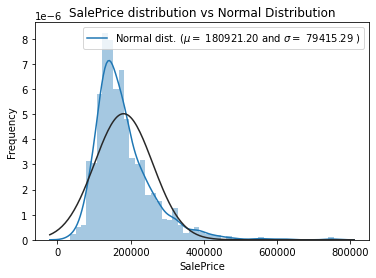

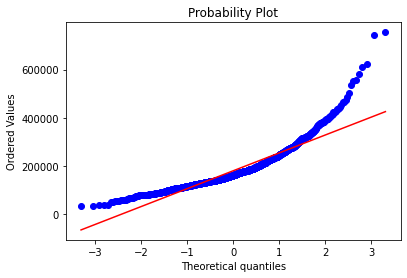

In [ ]:
# Getting the main parameters of the Normal Ditribution ()
(mu, sigma) = norm.fit(train_data['SalePrice'])

#Now plot the distribution20,8)
plt.figure(figsize=(6,4))
sns.distplot(train_data['SalePrice'] , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution vs Normal Distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

#Get also the QQ-plot
fig = plt.figure(figsize=(6,4))
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

![download.png](attachment:724b6325-4633-474e-b568-472e952b8438.png)## Skewness

Iis the degree of distortion(asymmetrical) from the symmetrical bell curve or the normal curve.
So, a symmetrical distribution will have a skewness of "0".
There are two types of Skewness: Positive and Negative.
### Positive Skewness(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter.
 In positive Skewness the mean and median will be greater than the mode similar to this dataset. Which means more houses were sold by less than the average price.
### Negative Skewness means the tail on the left side of the distribution is longer and fatter.
Here is a picture to make more sense.
![image.png](attachment:36a05e0f-92ce-4226-8f6b-f8dd1282e4b3.png)

## Kurtosis
In probability theory and statistics, Kurtosis is the measure of the "tailedness" of the probability.
In other words, it is the measure of the extreme values(outliers) present in the distribution.

![image.png](attachment:5aa9193e-026c-4d11-9a09-f9de82137733.png)

### In literature, acceptable values for skewness are between -0.5 and 0.5 while -2 and 2 for Kurtosis.

In [ ]:
# Skew and kurt of target varible

print("Skewness: %f" % abs(train_data['SalePrice']).skew())
print("Kurtosis: %f" % abs(train_data['SalePrice']).kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Correlation Matrix
The correlation matrix is the best way to see all the numerical correlation between features. Let's see which are the feature that correlate most with our target variable

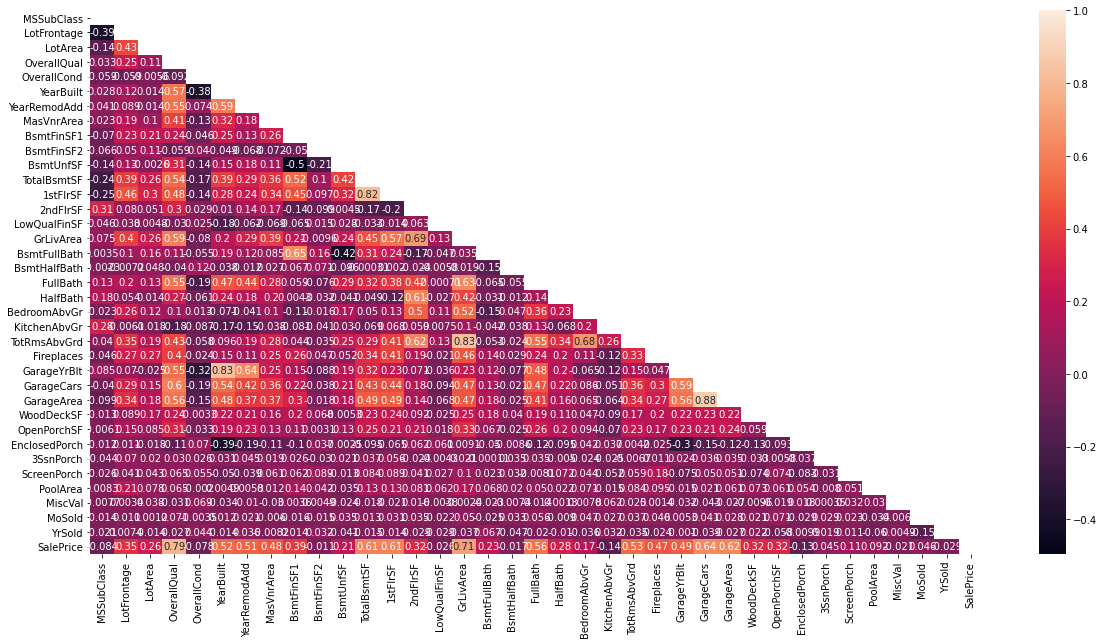

In [ ]:
#Correlation matrix

plt.figure(figsize=(20,10))
corrmat = train_data.corr('pearson')
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat,mask = mask, vmax=1, annot=True);

<AxesSubplot:>

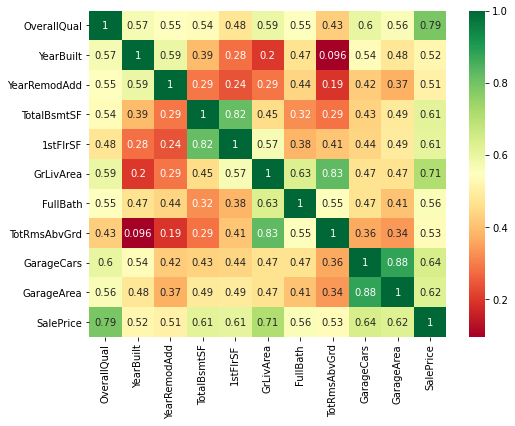

In [ ]:
# most correlated features
plt.figure(figsize=(8,6))
corrmat = train_data.corr('pearson')
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Now that we know which features correlates most with our target variable we can investigate them more in depth.

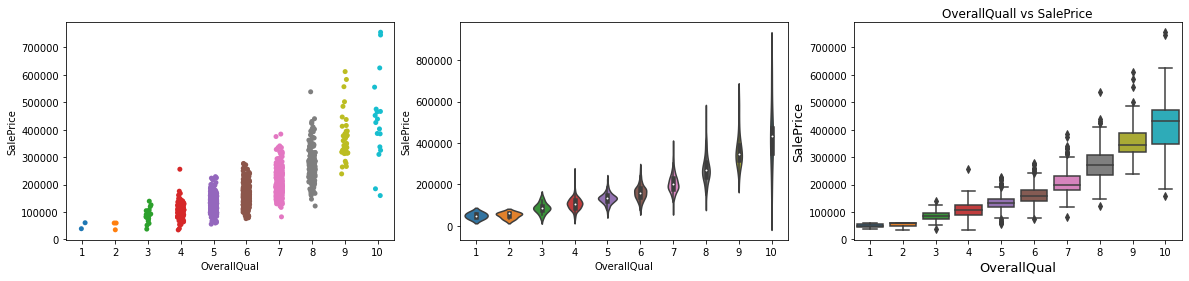

In [ ]:
# OverallQual - SalePrice
figure, ax = plt.subplots(1,3,figsize = (20,4))
sns.stripplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[0])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
sns.violinplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[1])
sns.boxplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[2])
plt.title('OverallQuall vs SalePrice', fontsize = 12)
plt.show()

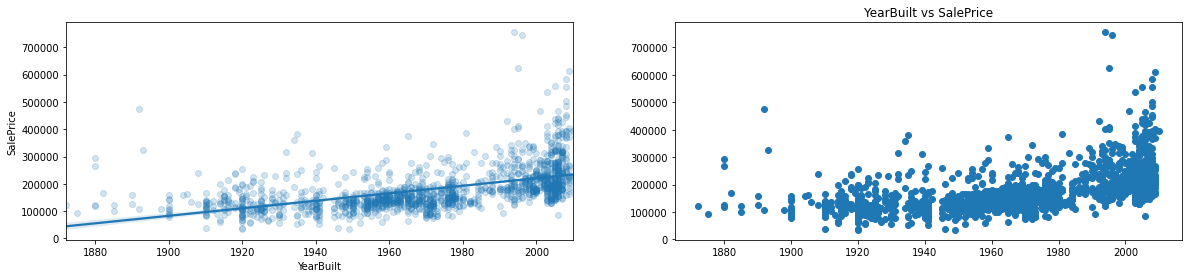

In [ ]:
# YearBuilt - SalePrice
figure, ax = plt.subplots(1,2,figsize = (20,4))
sns.regplot(data=train_data, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2},ax=ax[0])
ax[1].scatter(x = train_data['YearBuilt'], y = train_data['SalePrice'])
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.show()

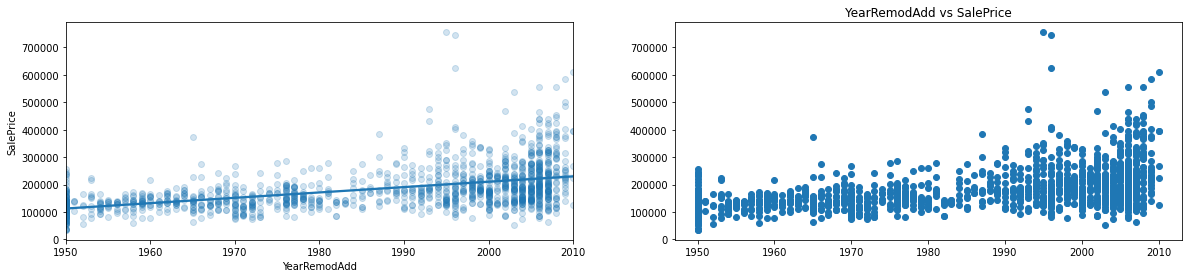

In [ ]:
# YearRemodAdd - SalePrice
figure, ax = plt.subplots(1,2,figsize = (20,4))
sns.regplot(data=train_data, x = 'YearRemodAdd', y='SalePrice', scatter_kws={'alpha':0.2},ax=ax[0])
ax[1].scatter(x = train_data['YearRemodAdd'], y = train_data['SalePrice'])
plt.title('YearRemodAdd vs SalePrice', fontsize = 12)
plt.show()

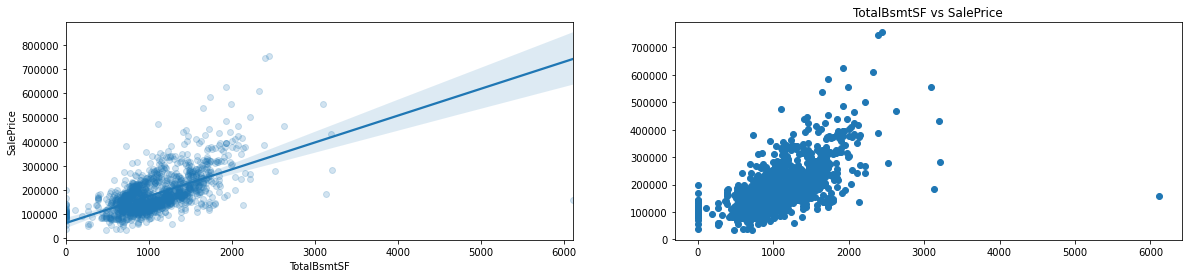

In [ ]:
# TotalBsmtSF - SalePrice
figure, ax = plt.subplots(1,2,figsize = (20,4))
sns.regplot(data=train_data, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2}, ax=ax[0])
ax[1].scatter(x = train_data['TotalBsmtSF'], y = train_data['SalePrice'])
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)
plt.show()

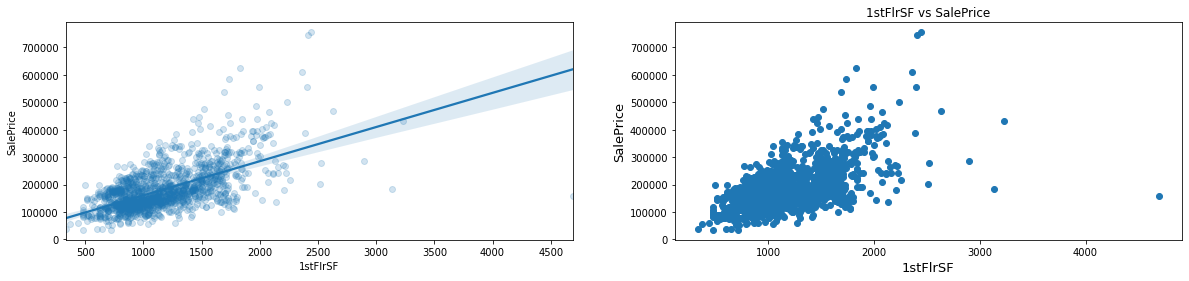

In [ ]:
# 1stFlrSF - SalePrice
figure, ax = plt.subplots(1,2,figsize = (20,4))
sns.regplot(data=train_data, x = '1stFlrSF', y='SalePrice', scatter_kws={'alpha':0.2}, ax=ax[0])
ax[1].scatter(x = train_data['1stFlrSF'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.title('1stFlrSF vs SalePrice', fontsize = 12)
plt.show()

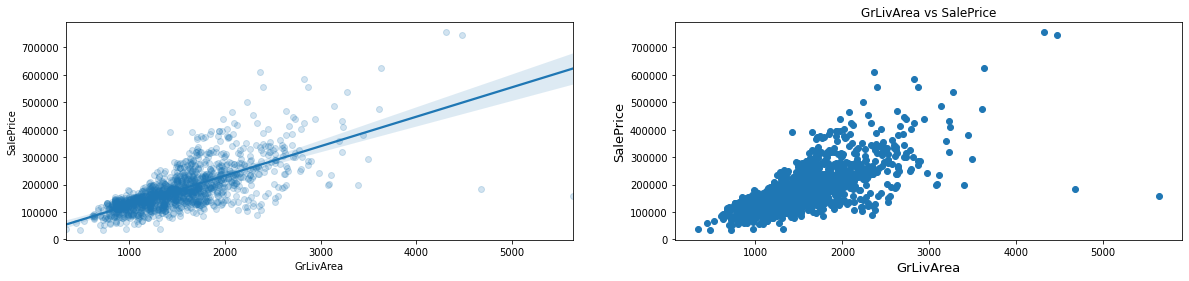

In [ ]:
# GrLivArea - SalePrice
figure, ax = plt.subplots(1,2,figsize = (20,4))
sns.regplot(data=train_data, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2}, ax=ax[0])
ax[1].scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.show()

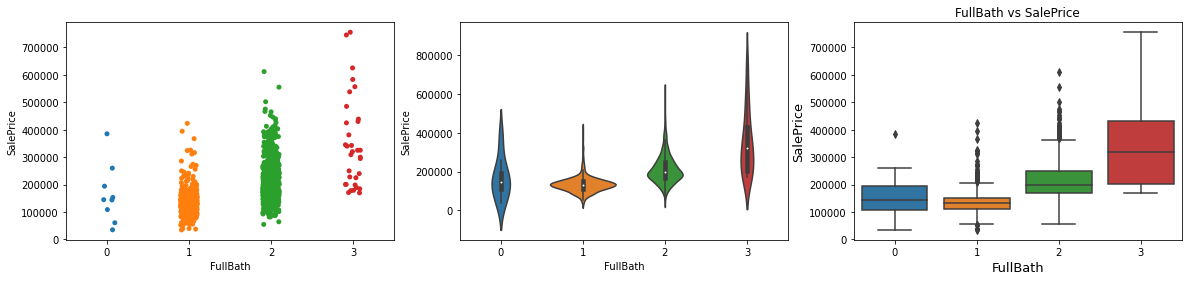

In [ ]:
# FullBath - Saleprice
figure, ax = plt.subplots(1,3,figsize = (20,4))
sns.stripplot(data=train_data, x = 'FullBath', y='SalePrice', ax = ax[0])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('FullBath', fontsize=13)
sns.violinplot(data=train_data, x = 'FullBath', y='SalePrice', ax = ax[1])
sns.boxplot(data=train_data, x = 'FullBath', y='SalePrice', ax = ax[2])
plt.title('FullBath vs SalePrice', fontsize = 12)
plt.show()

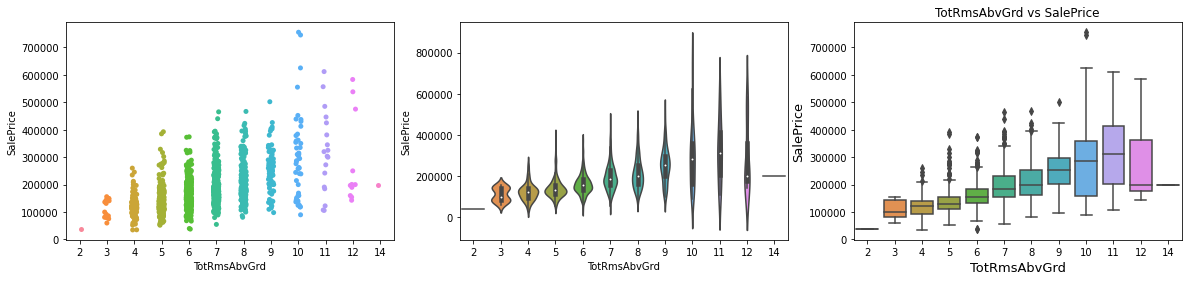

In [ ]:
# TotRmsAbvGrd - SalePrice
figure, ax = plt.subplots(1,3,figsize = (20,4))
sns.stripplot(data=train_data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[0])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotRmsAbvGrd', fontsize=13)
sns.violinplot(data=train_data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[1])
sns.boxplot(data=train_data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[2])
plt.title('TotRmsAbvGrd vs SalePrice', fontsize = 12)
plt.show()

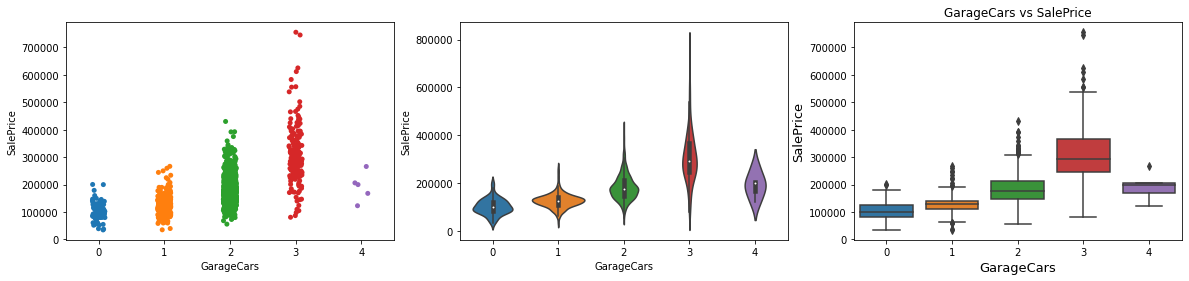

In [ ]:
# GarageCars - SalePrice
figure, ax = plt.subplots(1,3,figsize = (20,4))
sns.stripplot(data=train_data, x = 'GarageCars', y='SalePrice', ax = ax[0])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageCars', fontsize=13)
sns.violinplot(data=train_data, x = 'GarageCars', y='SalePrice', ax = ax[1])
sns.boxplot(data=train_data, x = 'GarageCars', y='SalePrice', ax = ax[2])
plt.title('GarageCars vs SalePrice', fontsize = 12)
plt.show()

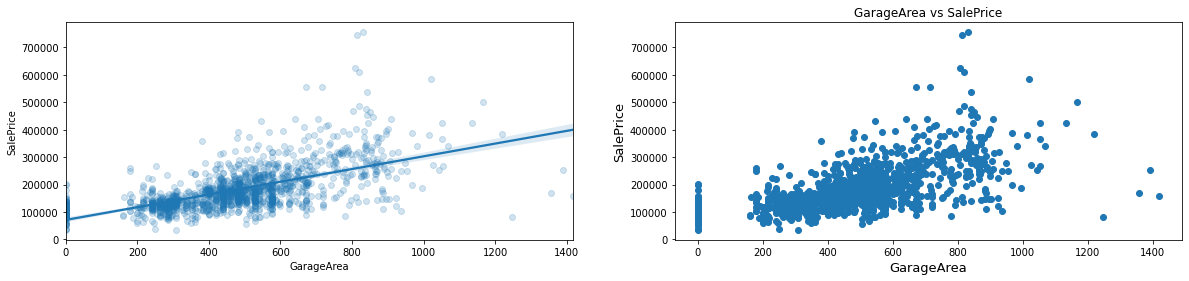

In [ ]:
# GarageArea - SalePrice
figure, ax = plt.subplots(1,2,figsize = (20,4))
sns.regplot(data=train_data, x = 'GarageArea', y='SalePrice', scatter_kws={'alpha':0.2}, ax=ax[0])
ax[1].scatter(x = train_data['GarageArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.title('GarageArea vs SalePrice', fontsize = 12)
plt.show()

# FEATURES ENGINEERING
let's first concatenate the train and test data in the same dataframe

In [ ]:
# Separating Target and Features and cocatenate datframe

ntrain = train_data.shape[0] #no. of rows in train_data
ntest = test_data.shape[0]  #no. of rows in test_data
target = train_data.SalePrice.values
train_test = pd.concat((train_data, test_data)).reset_index(drop=True)
train_test.drop(['SalePrice'], axis=1, inplace=True)
train_test.shape

(2919, 79)

In [ ]:
train_test.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Missing Data

In [ ]:
# Looking at NaN % within the data

nan = pd.DataFrame(train_test.isna().sum(), columns = ['NaN_sum'])
nan['Perc(%)'] = (nan['NaN_sum']/len(train_test))*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'],ascending=False)
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')
nan.head(6)

,NaN_sum,Perc(%),Usability
PoolQC,2909,99.657417,Discard
MiscFeature,2814,96.402878,Discard
Alley,2721,93.216855,Discard
Fence,2348,80.438506,Discard
FireplaceQu,1420,48.646797,Discard
LotFrontage,486,16.649538,Keep


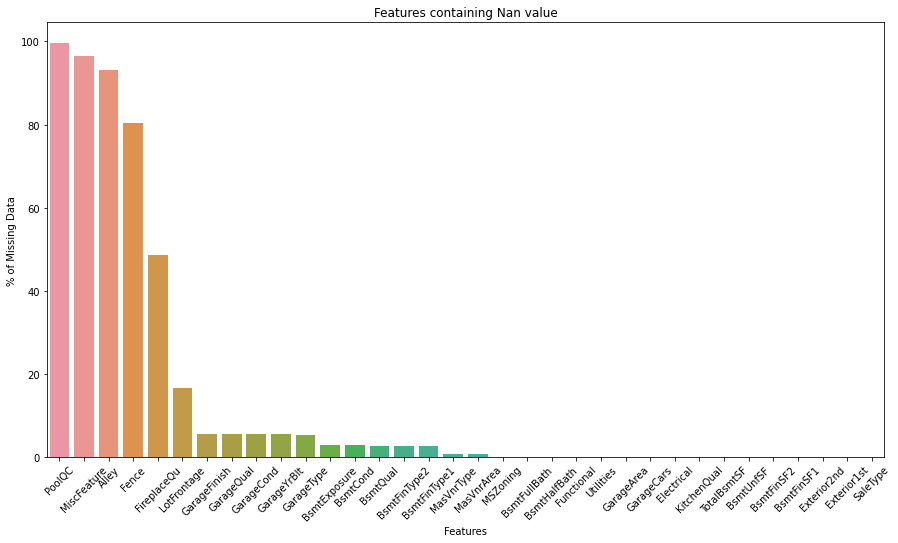

In [ ]:
# Plotting Nan

plt.figure(figsize = (15,8))
sns.barplot(x = nan.index, y = nan['Perc(%)'])
plt.xticks(rotation=45)
plt.title('Features containing Nan value')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')
plt.show()

Are we sure that all these nans are real missing values? Looking at the given description file, we can see how the majority of these nans reflect the absence of something, and for this reason, they are not nans. We can impute them (for numerical features) or substitute them with data in the file:

* PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
* MiscFeature : data description says NA means "no misc feature"
* Alley : data description says NA means "no alley access"
* Fence : data description says NA means "no fence"
* FireplaceQu : data description says NA means "no fireplace"
* LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood. Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
* GarageFinish, GarageQual, GarageCond, GarageType : Replacing missing data with None
* GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
* BsmtExposure, BsmtCond, BsmtQual, BsmtFinType2 and BsmtFinType1 : For all these categorical basement-related features, NaN means that there is no basement.
* MasVnrType and MasVnrArea : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
* MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
* BsmtFullBath, BsmtHalfBath, TotalBsmtSF, BsmtUnfSF, BsmtFinSF2, BsmtFinSF1  : missing values are likely zero for having no basement
* Functional : data description says NA means typical
* Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
* Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
* KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
* Exterior2nd and Exterior1st : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
* SaleType : Fill in again with most frequent which is "WD"

In [ ]:
#Imputing missing values

train_test["PoolQC"] = train_test["PoolQC"].fillna("No Pool")
train_test["MiscFeature"] = train_test["MiscFeature"].fillna("None")
train_test["Alley"] = train_test["Alley"].fillna("No alley")
train_test["Fence"] = train_test["Fence"].fillna("No fence")
train_test["FireplaceQu"] = train_test["FireplaceQu"].fillna("No fireplace")

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train_test["LotFrontage"] = train_test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_test[col] = train_test[col].fillna('No garage')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_test[col] = train_test[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test[col] = train_test[col].fillna('None')
    
    
train_test["MasVnrType"] = train_test["MasVnrType"].fillna("None")
train_test["MasVnrArea"] = train_test["MasVnrArea"].fillna(0)
train_test['MSZoning'] = train_test['MSZoning'].fillna(train_test['MSZoning'].mode()[0])
train_test = train_test.drop(['Utilities'], axis=1)
train_test["Functional"] = train_test["Functional"].fillna("Typ")
train_test['Electrical'] = train_test['Electrical'].fillna(train_test['Electrical'].mode()[0])
train_test['KitchenQual'] = train_test['KitchenQual'].fillna(train_test['KitchenQual'].mode()[0])
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])

Is there any remaining missing value ?

In [ ]:
#Check remaining missing values if any

nan = pd.DataFrame(train_test.isna().sum(), columns = ['NaN_sum'])
nan['Perc(%)'] = (nan['NaN_sum']/len(train_test))*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'],ascending=False)
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')
nan

,NaN_sum,Perc(%),Usability


It remains no missing value.

In [ ]:
#Transforming some numerical variables that are really categorical

#MSSubClass=The building class
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)

#Year and month sold are transformed into categorical features.
train_test['YrSold'] = train_test['YrSold'].astype(str)
train_test['MoSold'] = train_test['MoSold'].astype(str)

## Adding New Important Features
Let's create some new features combining the ones that we already have. These could help us to increase the performance of the model!

In [ ]:
# Adding total sqfootage feature 
train_test['TotalSF'] = train_test['TotalBsmtSF'] + train_test['1stFlrSF'] + train_test['2ndFlrSF']

In [ ]:
train_test.shape

(2919, 79)

## Remove Useless Features

In [ ]:
useless = ['YearRemodAdd', 'GarageYrBlt']
train_test.drop(useless,axis=1,inplace=True)
train_test.shape

(2919, 77)

## Skeweness Of Features

In [ ]:
#Skewed features
numeric_feats = train_test.dtypes[train_test.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train_test[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()

,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065


In [ ]:
# highly skewed fetures
high_skew = skewed_feats[skewed_feats > 0.5]
skew_index = high_skew.index
skew_index

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'TotalSF',
       'LotFrontage', '1stFlrSF', 'BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF',
       'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath',
       'BsmtFullBath', 'OverallCond'],
      dtype='object')

## LOG TRANSFORMATION
Normalize skewed features and target varible using log_transformation

In [ ]:
# Features transformation
for i in skew_index:
    train_test[i] = np.log1p(train_test[i])

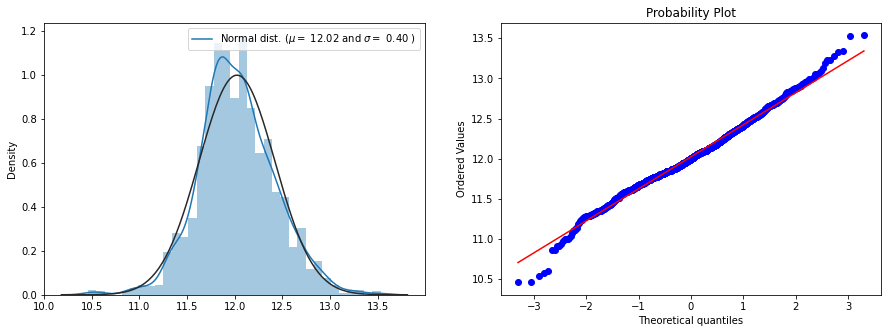

In [ ]:
# Target varible(SalePrice) after transformation
fig, ax = plt.subplots(1,2, figsize= (15,5))
target = np.log1p(target)

sns.distplot(target , fit=norm, ax=ax[0]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(target)

#Now plot the distribution
ax[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
res = stats.probplot(target, plot=plt)
plt.show()

## Dummy Features

In [ ]:
#Getting dummy categorical features
train_test = pd.get_dummies(train_test)
print(train_test.shape)

(2919, 329)


In [ ]:
# Seperate train and test data
train = train_test[:ntrain]
test = train_test[ntrain:]

In [ ]:
test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,Fire

## MODELING : Choose Best Model for Our Dataset Using K-Fold Cross validation Scoring
Import librairies

In [ ]:
import xgboost as xgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [ ]:
# Creation of the RMSE metric:
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [ ]:
# 10 Fold Cross validation

kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Bayesian_Ridge_Reg.','LGBM_Reg.','SVR',
                   'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.']

# Bayesian Ridge Regression

brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Light Gradient Boost Regressor

l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

# Support Vector Regression

svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor

xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boost Regressor

gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

# Cat Boost Regressor

catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std


Learning rate set to 0.042748
0:	learn: 0.3827224	total: 56.4ms	remaining: 56.4s
1:	learn: 0.3723197	total: 60.6ms	remaining: 30.2s
2:	learn: 0.3627635	total: 62.7ms	remaining: 20.8s
3:	learn: 0.3536276	total: 64.3ms	remaining: 16s
4:	learn: 0.3447013	total: 65.9ms	remaining: 13.1s
5:	learn: 0.3359634	total: 67.4ms	remaining: 11.2s
6:	learn: 0.3272150	total: 69ms	remaining: 9.79s
7:	learn: 0.3200045	total: 70.4ms	remaining: 8.73s
8:	learn: 0.3118277	total: 72ms	remaining: 7.93s
9:	learn: 0.3043598	total: 73.6ms	remaining: 7.29s
10:	learn: 0.2974592	total: 75.1ms	remaining: 6.75s
11:	learn: 0.2905149	total: 76.7ms	remaining: 6.32s
12:	learn: 0.2839707	total: 78.3ms	remaining: 5.94s
13:	learn: 0.2774255	total: 79.8ms	remaining: 5.62s
14:	learn: 0.2709058	total: 81.4ms	remaining: 5.35s
15:	learn: 0.2653026	total: 83ms	remaining: 5.11s
16:	learn: 0.2596856	total: 84.7ms	remaining: 4.9s
17:	learn: 0.2542746	total: 86.3ms	remaining: 4.71s
18:	learn: 0.2491035	total: 87.9ms	remaining: 4.54s
1

In [ ]:
final_cv_score

,Regressors,RMSE_mean,RMSE_std
0,Bayesian_Ridge_Reg.,0.127372,0.024410
1,LGBM_Reg.,0.130979,0.020404
2,SVR,0.279115,0.022449
3,Dec_Tree_Reg.,0.200773,0.031500
4,Random_Forest_Reg.,0.140665,0.023266
5,XGB_Reg.,0.136997,0.021506
6,Grad_Boost_Reg.,0.126387,0.019222
7,Cat_Boost_Reg.,0.118577,0.020714


#### Here we see that cat_boost_reg is the best model for this problem.

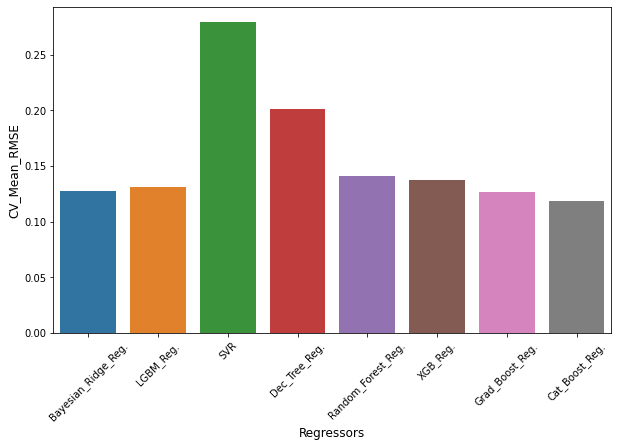

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

## TRAIN-TEST SPLIT THE DATA

In [ ]:
# Train-Test split the data

X_train,X_val,y_train,y_val = train_test_split(train,target,test_size = 0.1,random_state=42)

### Lets check Gradient boosting model and do some analysis

In [ ]:
# Gradient boosting regressor
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
gbr_pred = gb.predict(X_val)
gb_score = rmse(y_val, gbr_pred)
gb_score

0.11668209488993658

## HYPERPARAMETERS

In [ ]:
# Preforming a Random Grid Search to find the best combination of parameters
parameters = {
    "n_estimators":[5,50,250],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10]
}
gb_model= GradientBoostingRegressor()
search = RandomizedSearchCV(gb_model,parameters)
result = search.fit(X_train,y_train)
result.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}

In [ ]:
#Gradient model after tuning best hyperparameters
parameters = {
    "n_estimators": 50,
    "max_depth":3,
    "learning_rate": 0.1
}

final_gb = GradientBoostingRegressor(**parameters)
final_gb.fit(X_train,y_train)
final_gbr_pred = final_gb.predict(X_val)
final_gb_score = rmse(y_val, gbr_pred)
final_gb_score

0.11668209488993658

## FINAL MODEL : CATBOOST REGRESSOR

In [ ]:
# Cat Boost Regressor

cat_model = CatBoostRegressor()
cat_model.fit(X_train,y_train)
cat_pred = cat_model.predict(X_val)
cat_score = rmse(y_val, cat_pred)

Learning rate set to 0.042748
0:	learn: 0.3830233	total: 2.01ms	remaining: 2s
1:	learn: 0.3726550	total: 4ms	remaining: 1.99s
2:	learn: 0.3630679	total: 6ms	remaining: 2s
3:	learn: 0.3538183	total: 8.39ms	remaining: 2.09s
4:	learn: 0.3454244	total: 10.8ms	remaining: 2.15s
5:	learn: 0.3366130	total: 13.1ms	remaining: 2.17s
6:	learn: 0.3278547	total: 15.4ms	remaining: 2.19s
7:	learn: 0.3199217	total: 17.4ms	remaining: 2.16s
8:	learn: 0.3117145	total: 20.1ms	remaining: 2.21s
9:	learn: 0.3047659	total: 21.9ms	remaining: 2.17s
10:	learn: 0.2976215	total: 24.4ms	remaining: 2.19s
11:	learn: 0.2904539	total: 27ms	remaining: 2.22s
12:	learn: 0.2837830	total: 29.2ms	remaining: 2.21s
13:	learn: 0.2772663	total: 31.1ms	remaining: 2.19s
14:	learn: 0.2710244	total: 35.2ms	remaining: 2.31s
15:	learn: 0.2651959	total: 37.3ms	remaining: 2.29s
16:	learn: 0.2595020	total: 39.5ms	remaining: 2.29s
17:	learn: 0.2543431	total: 41.8ms	remaining: 2.28s
18:	learn: 0.2489638	total: 43.9ms	remaining: 2.27s
19:	le

In [ ]:
cat_score

0.1144593064584432

### Wow! Pretty good
### Hence, this model score is good from others model.

In [ ]:
test_pred = cat_model.predict(test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head(5)

,Id,SalePrice
0,1461,129026.796120
1,1462,165844.581505
2,1463,189289.955607
3,1464,198066.221039
4,1465,182042.664628


In [ ]:
submission.to_csv("cat_model_result1.csv", index = False, header = True)

## Additional : More Knowledge about CatBoost Regressor

Now let's take a look at the top 20 most important variables for our model. This could give us further insight into the functioning of the algorithm and how and which data it uses most to arrive at the final prediction.

In [ ]:
# Features' importance of our model

feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp.head()

,Feature Id,Importances
0,TotalSF,23.582883
1,OverallQual,18.095908
2,YearBuilt,4.604626
3,GrLivArea,3.547125
4,OverallCond,3.120240


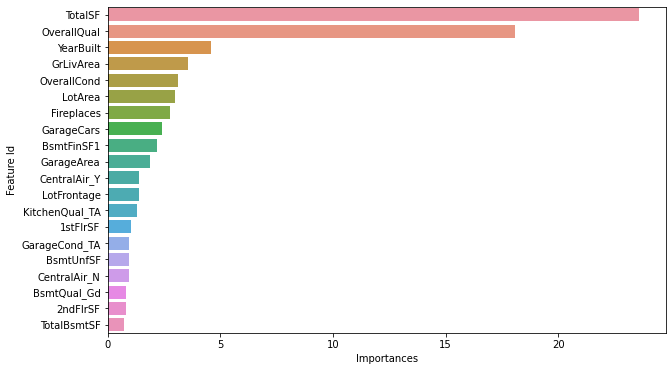

In [ ]:
# Plotting top 20 features' importance

plt.figure(figsize = (10,6))
sns.barplot(feat_imp['Importances'][:20],feat_imp['Feature Id'][:20], orient = 'h')
plt.show()

## CONCLUSION
Hence, on given test data of this problem our prediction is accurate to 87.50 %  : 
### RMSE Score : 0.12499


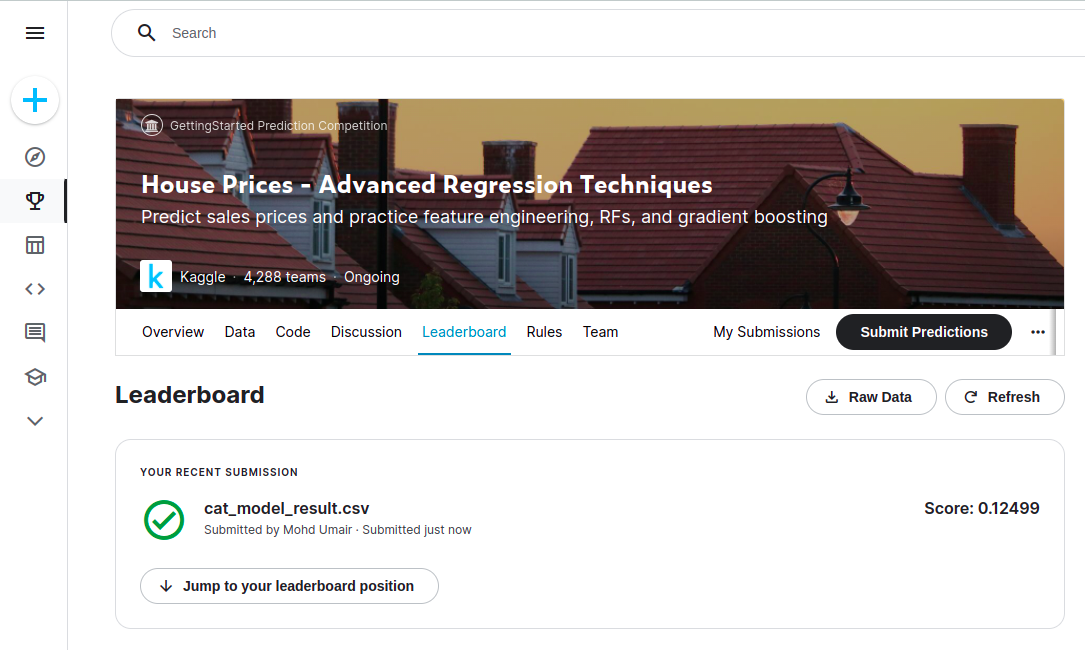